In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Set parameters
nb_epoch = 20  # Number of training iterations
l_rate = 0.05  # Learning rate
dim = 2  # Number of features (2D)
N = 2000  # Total number of data points

# Define boundaries for random data generation
LBx = np.zeros(dim)
UBx = np.ones(dim) * 5

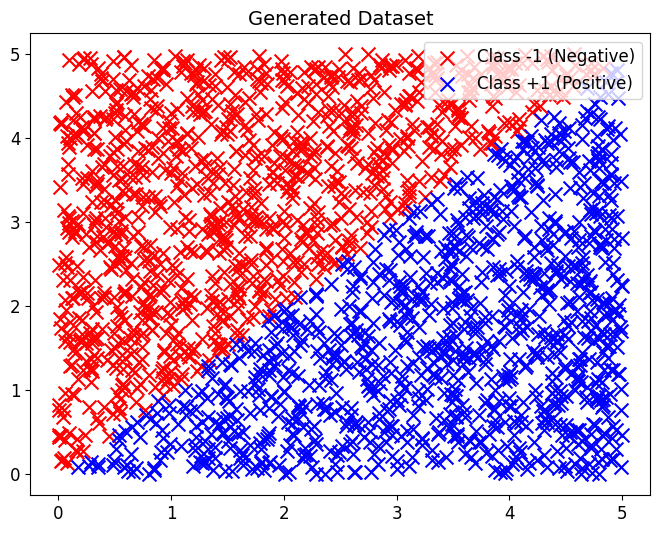

In [8]:
# Generate random data points within given boundaries
data = np.zeros((dim, N))
for i in range(dim):
    x = np.random.rand(1, N) * (UBx[i] - LBx[i])  # Random values scaled to range
    data[i] = x  # Store generated data

# Define class labels based on a simple rule: Above diagonal -> Class 1, Below -> Class -1
C = -np.ones(N)  # Initialize all points as -1 (Red)
C[data[0] > data[1]] = 1  # Assign +1 (Blue) for points above diagonal

# Plot the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(data[0, C == -1], data[1, C == -1], marker="x", s=100, c='r', label="Class -1 (Negative)")
plt.scatter(data[0, C == 1], data[1, C == 1], marker="x", s=100, c='b', label="Class +1 (Positive)")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="upper right")
plt.title("Generated Dataset", fontsize=14)
plt.show()

In [9]:
# Shuffle dataset indices
idx_temp = np.random.permutation(data.shape[1])

# Define training and test sets
Ns = 100  # Number of training samples
x_training = data[:, idx_temp[:Ns]]
x_test = data[:, idx_temp[Ns:]]
y_training = C[idx_temp[:Ns]]
y_test = C[idx_temp[Ns:]]

# Initialize weight vector: [Bias, Feature 1, Feature 2]
weights = np.c_[0, np.random.rand(2).reshape(1, -1)]

# Convert training data into structured matrix format with bias term
matrix = []
for i in range(Ns):
    matrix.append(np.c_[np.c_[1, x_training[:, i].reshape(1, -1)], y_training[i]])

# Print initial weights
print("\nInitial Weights:", weights)


Initial Weights: [[0.         0.82006816 0.81859876]]


In [10]:
## Training Phase
for epoch in range(nb_epoch):
    total_error = 0  # Track misclassified points

    for i in range(len(matrix)):
        point = np.array(matrix[i])  # Extract data point
        wTX = np.array(point[0, :-1]) * np.array(weights)  # Compute weighted sum
        pred = 1 if np.sum(wTX) >= 0 else -1  # Apply activation function

        # Check if classification is correct
        if int(point[0, -1]) == pred:
            error = 0
        else:
            error = 1
            total_error += 1  # Increment error count

        # Update weights if there is a misclassification
        if error != 0:
            for j in range(weights.shape[1]):
                weights[0, j] += (l_rate * point[0, j] * point[0, -1]) 

    # Print training progress
    error_rate = total_error / len(matrix)
    print(f'Epoch {epoch + 1}: Training Error Rate = {error_rate:.2f}')

# Print final weights
print("\nFinal Weights:", weights)

Epoch 1: Training Error Rate = 0.20
Epoch 2: Training Error Rate = 0.01
Epoch 3: Training Error Rate = 0.03
Epoch 4: Training Error Rate = 0.05
Epoch 5: Training Error Rate = 0.10
Epoch 6: Training Error Rate = 0.05
Epoch 7: Training Error Rate = 0.03
Epoch 8: Training Error Rate = 0.00
Epoch 9: Training Error Rate = 0.00
Epoch 10: Training Error Rate = 0.00
Epoch 11: Training Error Rate = 0.00
Epoch 12: Training Error Rate = 0.00
Epoch 13: Training Error Rate = 0.00
Epoch 14: Training Error Rate = 0.00
Epoch 15: Training Error Rate = 0.00
Epoch 16: Training Error Rate = 0.00
Epoch 17: Training Error Rate = 0.00
Epoch 18: Training Error Rate = 0.00
Epoch 19: Training Error Rate = 0.00
Epoch 20: Training Error Rate = 0.00

Final Weights: [[-0.05        0.69921562 -0.69024776]]


In [ ]:
# Evaluate training accuracy
correct_counter = 0
for i in range(len(matrix)):
    point = np.array(matrix[i])
    wTX = np.array(point[0, :-1]) * np.array(weights)
    pred = 1 if np.sum(wTX) >= 0 else -1
    if int(point[0, -1]) == pred:
        correct_counter += 1

train_accuracy = correct_counter / len(matrix)
print(f"\nTraining Accuracy: {train_accuracy:.2f}")

# Testing Phase
ypred = []
ypred_c = []
test_matrix = []

for i in range(x_test.shape[1]):
    test_matrix.append(np.c_[np.c_[1, x_test[:, i].reshape(1, -1)], y_test[i]])

# Evaluate test accuracy
correct_counter = 0
for i in range(len(test_matrix)):
    point = np.array(test_matrix[i])
    wTX = np.array(point[0, :-1]) * np.array(weights)
    pred = 1 if np.sum(wTX) >= 0 else -1

    ypred.append(pred)  # Store predictions

    if int(point[0, -1]) == pred:
        correct_counter += 1
        ypred_c.append(1)
    else:
        ypred_c.append(-1)

test_accuracy = correct_counter / len(test_matrix)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

# Plot test results with legend
plt.figure(figsize=(8, 6))
plt.scatter(x_test[0, np.array(ypred) == 1], x_test[1, np.array(ypred) == 1], marker="x", s=100, c='r', label="Class +1")
plt.scatter(x_test[0, np.array(ypred) == -1], x_test[1, np.array(ypred) == -1], marker="x", s=100, c='b', label="Class -1")
plt.scatter(x_test[0, np.array(ypred_c) == -1], x_test[1, np.array(ypred_c) == -1], marker="+", s=150, c='y', label="Misclassified")
plt.scatter(x_test[0, np.array(ypred_c) == 1], x_test[1, np.array(ypred_c) == 1], marker=".", s=150, c='g', label="Correctly classified")
plt.scatter(x_training[0, y_training == 1], x_training[1, y_training == 1], marker="o", s=200, c='r', label="Training Class +1")
plt.scatter(x_training[0, y_training == -1], x_training[1, y_training == -1], marker="o", s=200, c='b', label="Training Class -1")
plt.title(f'With {Ns} training points, Test Accuracy = {test_accuracy:.2f}', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.legend(fontsize=10, loc="upper right")  # Add legend for clarity
plt.show()